<a href="https://colab.research.google.com/github/BeaEsparcia/NLP-Projects/blob/main/An%C3%A1lisis_de_sentimientos_en_twitter_sobre_feminismo_(espa%C3%B1ol).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En el contexto de las discusiones digitales sobre feminismo, tanto individuos interesados como organizaciones luchan por comprender el sentimiento público general, lo que dificulta la promoción eficaz de la igualdad de género.

**Entender los sentimientos hacia el feminismo es vital para abordar desinformaciones**, ajustar estrategias de comunicación y promover un diálogo constructivo sobre la igualdad de género.

El objetivo de esta práctica es  **desarrollar un análisis que revele tendencias de sentimiento (positivas, negativas, neutrales) en publicaciones digitales sobre el feminismo**, que proporcionen datos reveladores para crear estrategias comunicativas más efectivas.

Preparo mi entorno de Colab instalando la biblioteca Transformers

In [ ]:
!pip install transformers


Cargo el modelo BETO (BERT para español) y el tokenizador

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

model_name = "dccuchile/bert-base-spanish-wwm-cased"
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3) #Clasifico el sentimiento en tres categorías.
tokenizer = AutoTokenizer.from_pretrained(model_name)

nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
#creo una pipeline de análisis de sentimientos usando la biblioteca transformers, la cual prepara el modelo BETO y su tokenizador correspondiente para evaluar y clasificar los sentimientos de los textos ingresados.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Preparo los tuits recolectados en una lista, para ser procesados.

tweets = [
    "El feminismo arruinó el mundo y algunas aún no la ven.",
    "@perezreverte Sobre mujer y #feminismo hay mucho ruido, y a veces, mucha demagogia y mucho folclore. Lo que hemos querido ha sido traer a autoridades, un discurso serio de mujeres con una presencia y una trayectoria importante y consolidada, mujeres decisivas e influyentes de verdad, no para que nos cuenten lo que debe ser la mujer en el futuro, que todos lo sabemos, sino cómo es la mujer ahora y cómo se ha hecho, hasta dónde han llegado, por qué, cómo y contra qué. Ese tipo de mujeres que son las que nos interesan de verdad, con discursos solventes y serios, con autoridad, son las que realmente van a ocupar los asientos en estas tres jornadas.",
    "Erradicando toda clase de injusticias: El Movimiento Feminista es inherentemente interseccional, lo que significa que reconoce y aborda las intersecciones de la opresión, incluidas la raza, la clase, la sexual…",
    "La mejor ministra que ha tenido este país #irenemontero #feminismo",
    "Todas las políticas woke quieren acabar con el prototipo de hombre necesario para la sociedad",
    "Y finalmente la #masculinidad #tóxica se basa en lo q dije pq si la mujer deja de depender de un hombre, el hombre ve que ya no aporta, q ya no le dependen,…y deja de sentirse hombre",
    "Me cago en la cuotas vaginales. Ahora resulta que la empresa que me echó de la formación se arrepiente y me ofrece la posibilidad de trabajar con ellos, y yo ocupo el lugar de una mujer que no ha durado ni un día. Alucinante.",
    "SÍ. SOY FEMINISTA. #feminismo #igualdad #8Marzo #8M",
    "En el autobús, 8 personas hablando de machismo en España. 7 tíos jóvenes diciendo que hay machismo y la única tía jóven niega que haya machismo. Los hombres jóvenes están agilipollados.",
    "el feminismo es la justicia de este siglo #feminismo #irenemontero #8Marzo #8M",
    "Sin #Abolición de la #Prostitución, no habrá igualdad El #Feminismo es #Abolicionista. Los seres humanos no son mercancía que vender y con la que tratar. #AbolicionProstitucion #ProstitucionEsViolenciaSexual",
    "Viva la LUCHA FEMINISTA #feminismo #igualdad #8Marzo #8M",
    "«No hay barrera cerradura, ni cerrojo que puedas imponer a la libertad de tu mente» Virginia Woolf #TalDiaComoHoy moría una de las grandes de la historia dla #literatura en general y del #feminismo #NOALOLVIDO #ComparteCultura #Cultura #MemoriaHistórica #feminismo",
    "Emmeline Pankhurst fue la líder del movimiento feminista y sufragista del Reino Unido. Fue encarcelada en múltiples ocasiones y llevó a cabo varias huelgas de hambre dentro de la prisión a modo de protesta. #feminismo #feministasabolicionistas #feminismoradical",
    "Las feministas vandalizaron el #8M la Universidad del Rosario en #Bogota. Han pasado 20 días y nada que limpian. ¡Dañaron nuestro patrimonio cultural y hay que saber cuánto nos costará su chiste a la ciudadanía! #NoAlVandalismo #feminismo #izquierda #Colombia",
    "#Feminismo #Hombres #Mujeres #DerechosHumanos Lo dicho: Las feministas tienen envidia de pene.",
    "Las denuncias falsas no existen ya... Al menos 1 de cada 7 de todos los hombres ha sufrido una acusación falsa de agresión o violencia sexual. Eso es mucho más que los agresores auténticos... En divorcios, más del 50% de denuncias resultan ser falsas",
    "Miles de hombres se suicidan en nuestro país cada año Cuántos más tendremos que ver morir para que paren esta masacre? Tienen algo que decir sobre esto las mujeres que denuncian en falso?",
    "No somos mujeres. Les damos igual. No. No les damos igual. Peor aún…",
    "No, no hay ningún problema con estar sola. El problema radica en la razón por la que estás sola, si es por odio, resentimiento o porque te has comido la narrativa del 'empoderamiento', entonces si hay un problema; porque esa soledad, no viene de un corazón sano."
]


In [ ]:
#Analizo los sentimientos de cada tuit e imprimo los resultados.
for tweet in tweets:
    result = nlp(tweet)
    print(f"Tweet: {tweet}\nSentimiento: {result}\n")

Tweet: El feminismo arruinó el mundo y algunas aún no la ven.
Sentimiento: [{'label': 'LABEL_0', 'score': 0.36417436599731445}]

Tweet: @perezreverte Sobre mujer y #feminismo hay mucho ruido, y a veces, mucha demagogia y mucho folclore. Lo que hemos querido ha sido traer a autoridades, un discurso serio de mujeres con una presencia y una trayectoria importante y consolidada, mujeres decisivas e influyentes de verdad, no para que nos cuenten lo que debe ser la mujer en el futuro, que todos lo sabemos, sino cómo es la mujer ahora y cómo se ha hecho, hasta dónde han llegado, por qué, cómo y contra qué. Ese tipo de mujeres que son las que nos interesan de verdad, con discursos solventes y serios, con autoridad, son las que realmente van a ocupar los asientos en estas tres jornadas.
Sentimiento: [{'label': 'LABEL_0', 'score': 0.3532871901988983}]

Tweet: Erradicando toda clase de injusticias: El Movimiento Feminista es inherentemente interseccional, lo que significa que reconoce y aborda la

 El modelo clasifica cada entrada de texto en una de estas tres categorías: 0 para negativo, 1 neutral y 2 positivo.

  La salida del modelo también incluye un score para cada clasificación, que indica la confianza del modelo en su predicción.

  Muchos de los tuits han sido catalogados como positivos (label 2), aunque fuesen sarcásticos, lo que nos indica que el modelo no es del todo confiable a la hora de captar dobles intenciones o sarcasmos.

Para realizar un análisis cuantitativo, primero categorizo cada tuit según su etiqueta de sentimiento (LABEL_0, LABEL_1, LABEL_2) y luego cuento cuántos tweets hay en cada categoría.

In [ ]:
#Estructuro los resultados del análisis de sentimientos. He creado un diccionario para cada tuit con los campos texto, label, y score, y luego lo he organizado todo en una lista.

resultados_sentimientos = [
    {"texto": "El feminismo arruinó el mundo y algunas aún no la ven.", "label": "LABEL_0", "score": 0.36417436599731445},
    {"texto": "@perezreverte Sobre mujer y #feminismo hay mucho ruido, y a veces, mucha demagogia y mucho folclore. Lo que hemos querido ha sido traer a autoridades, un discurso serio de mujeres con una presencia y una trayectoria importante y consolidada, mujeres decisivas e influyentes de verdad, no para que nos cuenten lo que debe ser la mujer en el futuro, que todos lo sabemos, sino cómo es la mujer ahora y cómo se ha hecho, hasta dónde han llegado, por qué, cómo y contra qué. Ese tipo de mujeres que son las que nos interesan de verdad, con discursos solventes y serios, con autoridad, son las que realmente van a ocupar los asientos en estas tres jornadas.", "label": "LABEL_0", "score": 0.3532871901988983},
    {"texto": "Erradicando toda clase de injusticias: El Movimiento Feminista es inherentemente interseccional, lo que significa que reconoce y aborda las intersecciones de la opresión, incluidas la raza, la clase, la sexual…", "label": "LABEL_2", "score": 0.40407702326774597},
    {"texto": "La mejor ministra que ha tenido este país #irenemontero #feminismo", "label": "LABEL_2", "score": 0.36735883355140686},
    {"texto": "Todas las políticas woke quieren acabar con el prototipo de hombre necesario para la sociedad", "label": "LABEL_2", "score": 0.3716360330581665},
    {"texto": "Y finalmente la #masculinidad #tóxica se basa en lo q dije pq si la mujer deja de depender de un hombre, el hombre ve que ya no aporta, q ya no le dependen,…y deja de sentirse hombre", "label": "LABEL_2", "score": 0.37940603494644165},
    {"texto": "Me cago en la cuotas vaginales. Ahora resulta que la empresa que me echó de la formación se arrepiente y me ofrece la posibilidad de trabajar con ellos, y yo ocupo el lugar de una mujer que no ha durado ni un día. Alucinante.", "label": "LABEL_0", "score": 0.3996769189834595},
    {"texto": "SÍ. SOY FEMINISTA. #feminismo #igualdad #8Marzo #8M", "label": "LABEL_2", "score": 0.3523135185241699},
    {"texto": "En el autobús, 8 personas hablando de machismo en España. 7 tíos jóvenes diciendo que hay machismo y la única tía jóven niega que haya machismo. Los hombres jóvenes están agilipollados.", "label": "LABEL_2", "score": 0.3603323996067047},
    {"texto": "el feminismo es la justicia de este siglo #feminismo #irenemontero #8Marzo #8M", "label": "LABEL_2", "score": 0.3603420853614807},
    {"texto": "Sin #Abolición de la #Prostitución, no habrá igualdad El #Feminismo es #Abolicionista. Los seres humanos no son mercancía que vender y con la que tratar. #AbolicionProstitucion #ProstitucionEsViolenciaSexual", "label": "LABEL_2", "score": 0.3600955903530121},
    {"texto": "Viva la LUCHA FEMINISTA #feminismo #igualdad #8Marzo #8M", "label": "LABEL_2", "score": 0.3478352129459381},
    {"texto": "«No hay barrera cerradura, ni cerrojo que puedas imponer a la libertad de tu mente» Virginia Woolf #TalDiaComoHoy moría una de las grandes de la historia dla #literatura en general y del #feminismo #NOALOLVIDO #ComparteCultura #Cultura #MemoriaHistórica #feminismo", "label": "LABEL_2", "score": 0.35132110118865967},
    {"texto": "Emmeline Pankhurst fue la líder del movimiento feminista y sufragista del Reino Unido. Fue encarcelada en múltiples ocasiones y llevó a cabo varias huelgas de hambre dentro de la prisión a modo de protesta. #feminismo #feministasabolicionistas #feminismoradical", "label": "LABEL_2", "score": 0.36057862639427185},
    {"texto": "Las feministas vandalizaron el #8M la Universidad del Rosario en #Bogota. Han pasado 20 días y nada que limpian. ¡Dañaron nuestro patrimonio cultural y hay que saber cuánto nos costará su chiste a la ciudadanía! #NoAlVandalismo #feminismo #izquierda #Colombia", "label": "LABEL_1", "score": 0.34197622537612915},
    {"texto": "#Feminismo #Hombres #Mujeres #DerechosHumanos Lo dicho: Las feministas tienen envidia de pene.", "label": "LABEL_2", "score": 0.3699174225330353},
    {"texto": "Las denuncias falsas no existen ya... Al menos 1 de cada 7 de todos los hombres ha sufrido una acusación falsa de agresión o violencia sexual. Eso es mucho más que los agresores auténticos... En divorcios, más del 50% de denuncias resultan ser falsas", "label": "LABEL_0", "score": 0.3604559898376465},
    {"texto": "Miles de hombres se suicidan en nuestro país cada año Cuántos más tendremos que ver morir para que paren esta masacre? Tienen algo que decir sobre esto las mujeres que denuncian en falso?", "label": "LABEL_0", "score": 0.3673025965690613},
    {"texto": "No somos mujeres. Les damos igual. No. No les damos igual. Peor aún…", "label": "LABEL_2", "score": 0.3620305359363556},
    {"texto": "No, no hay ningún problema con estar sola. El problema radica en la razón por la que estás sola, si es por odio, resentimiento o porque te has comido la narrativa del 'empoderamiento', entonces si hay un problema; porque esa soledad, no viene de un corazón sano.", "label": "LABEL_2", "score": 0.3547070026397705}
]



Lo organizo en un DataFrame y cuento las etiquetas.

In [ ]:
import pandas as pd

# Convierto los resultados en un DataFrame
df = pd.DataFrame(resultados_sentimientos)

# Cuento cuántos tuits hay en cada categoría de 'label'
conteo_labels = df['label'].value_counts()

# Muestro los conteos
print(conteo_labels)


LABEL_2    14
LABEL_0     5
LABEL_1     1
Name: label, dtype: int64


Para visualizar los resultados en un código de barras, utilizo 'matplotlib'

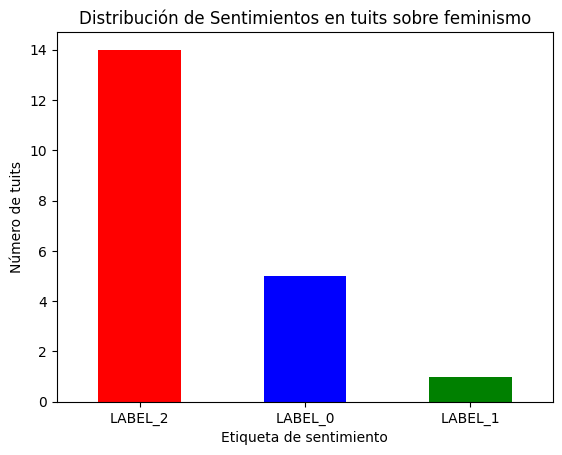

In [ ]:
# Importo 'matplotlib'
import matplotlib.pyplot as plt

# Genero un gráfico de barras
conteo_labels.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Distribución de sentimientos en tuits sobre feminismo')
plt.xlabel('Etiqueta de sentimiento')
plt.ylabel('Número de tuits')
plt.xticks(rotation=0)
plt.show()
